# Prediction on Survival after Thoracic Surgery Based on real life data 

# PROGRAMMING IN PYTHON
# SECTION: B
# FINAL PROJECT ON MACHINE LEARNING MODEL

In [67]:
#importing the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics 
%matplotlib inline

<h3>Dataset reference </h3>

https://archive.ics.uci.edu/ml/datasets/Thoracic+Surgery+Data

In [96]:
#importing the dataset from csv file in a dataframe and showing
dF=pd.read_csv('t_surgery.csv')
dF

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,466,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63,F
466,467,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61,F
467,468,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52,F
468,469,DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79,F


<h3>Total Dataset Information</h3>

The data was collected retrospectively at Wroclaw Thoracic Surgery Centre for patients who underwent major lung resections for primary lung cancer in the years 2007â€“2011. The Centre is associated with the Department of Thoracic Surgery of the Medical University of Wroclaw and Lower-Silesian Centre for Pulmonary Diseases, Poland, while the research database constitutes a part of the National Lung Cancer Registry, administered by the Institute of Tuberculosis and Pulmonary Diseases in Warsaw, Poland.


Attribute Information:

1. DGN: Diagnosis - specific combination of ICD-10 codes for primary and secondary as well multiple tumours if any (DGN3,DGN2,DGN4,DGN6,DGN5,DGN8,DGN1)
2. PRE4: Forced vital capacity - FVC (numeric)
3. PRE5: Volume that has been exhaled at the end of the first second of forced expiration - FEV1 (numeric)
4. PRE6: Performance status - Zubrod scale (PRZ2,PRZ1,PRZ0)
5. PRE7: Pain before surgery (T,F)
6. PRE8: Haemoptysis before surgery (T,F)
7. PRE9: Dyspnoea before surgery (T,F)
8. PRE10: Cough before surgery (T,F)
9. PRE11: Weakness before surgery (T,F)
10. PRE14: T in clinical TNM - size of the original tumour, from OC11 (smallest) to OC14 (largest) (OC11,OC14,OC12,OC13)
11. PRE17: Type 2 DM - diabetes mellitus (T,F)
12. PRE19: MI up to 6 months (T,F)
13. PRE25: PAD - peripheral arterial diseases (T,F)
14. PRE30: Smoking (T,F)
15. PRE32: Asthma (T,F)
16. AGE: Age at surgery (numeric)
17. Risk1Y: 1 year survival period - (T)rue value if died (T,F)

<h3>Cleaning the Dataset</h3>

This dataset has all the columns with data with no missing value so there is no need of cleaning.

In [97]:
#Exploring the Details of the dataset
dF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       470 non-null    int64  
 1   DGN      470 non-null    object 
 2   PRE4     470 non-null    float64
 3   PRE5     470 non-null    float64
 4   PRE6     470 non-null    object 
 5   PRE7     470 non-null    object 
 6   PRE8     470 non-null    object 
 7   PRE9     470 non-null    object 
 8   PRE10    470 non-null    object 
 9   PRE11    470 non-null    object 
 10  PRE14    470 non-null    object 
 11  PRE17    470 non-null    object 
 12  PRE19    470 non-null    object 
 13  PRE25    470 non-null    object 
 14  PRE30    470 non-null    object 
 15  PRE32    470 non-null    object 
 16  AGE      470 non-null    int64  
 17  Risk1Yr  470 non-null    object 
dtypes: float64(2), int64(2), object(14)
memory usage: 66.2+ KB


<h3>Exploratory Data Analysis</h3>

In [98]:
#Returning All the keys from the dataset
dF.keys()

Index(['id', 'DGN', 'PRE4', 'PRE5', 'PRE6', 'PRE7', 'PRE8', 'PRE9', 'PRE10',
       'PRE11', 'PRE14', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'AGE',
       'Risk1Yr'],
      dtype='object')

In [99]:
#Replacing the Target Column True/False value with Died/Alive information
dF['Risk1Yr']=dF['Risk1Yr'].replace(['T','F'],['Died','Alive'])
#Printing the updated dataset
dF

,id,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,1,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,Alive
1,2,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,Alive
2,3,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,Alive
3,4,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,Alive
4,5,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,Died
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,466,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63,Alive
466,467,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61,Alive
467,468,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52,Alive
468,469,DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79,Alive


<h3>Visualizing by plotting some data to get some data about the dataset</h3>

Text(0.5, 1.0, 'Number of People Survival Status After Thoracic Surgery')

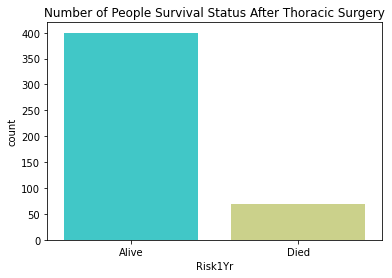

In [100]:
#Showing the number of bankrupcy or non-bankrupcy on a plot
sns.countplot(x='Risk1Yr',data=dF, palette='rainbow')
plt.title('Number of People Survival Status After Thoracic Surgery')

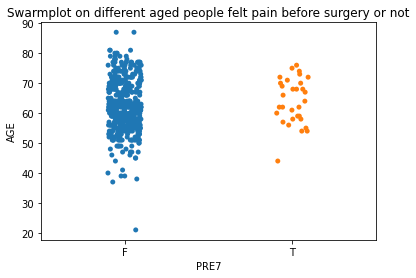

In [102]:
#Plotting the Data if People felt pain or not before surgery based on age
sns.stripplot(x='PRE7', y='AGE', data=dF)
plt.title("Swarmplot on different aged people felt pain before surgery or not");

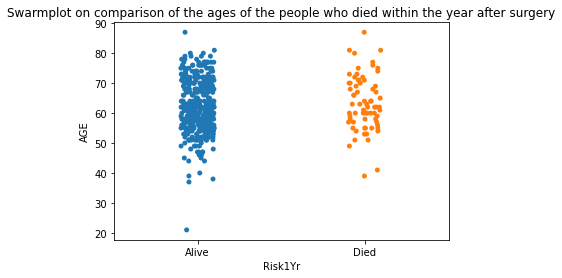

In [103]:
#Plotting Data to compare the ages of the people who died within the year after surgery
sns.stripplot(x='Risk1Yr', y='AGE', data=dF)
plt.title("Swarmplot on comparison of the ages of the people who died within the year after surgery");

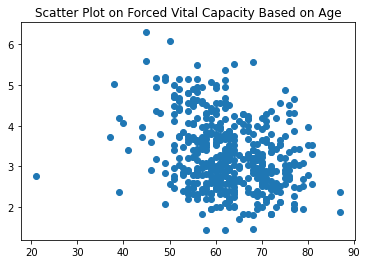

In [106]:
#Plotting Data to compare the ages of the people who died within the year after surgery
plt.scatter(dF['AGE'],dF['PRE4'])
plt.title("Scatter Plot on Forced Vital Capacity Based on Age");

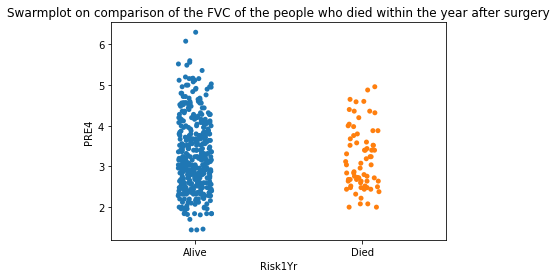

In [107]:
#Plotting Data to compare the ages of the people who died within the year after surgery
sns.stripplot(x='Risk1Yr', y='PRE4', data=dF)
plt.title("Swarmplot on comparison of the FVC of the people who died within the year after surgery");

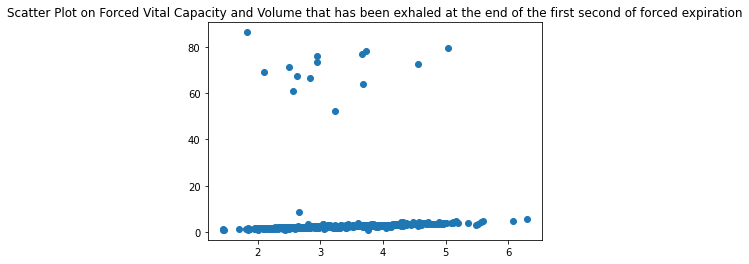

In [110]:
#Plotting Data to compare the ages of the people who died within the year after surgery
plt.scatter(dF['PRE4'],dF['PRE5'])
plt.title("Scatter Plot on Forced Vital Capacity and Volume that has been exhaled at the end of the first second of forced expiration");

<h3>Outcomes from the plotting</h3>

There was actually not that much idea generated from watching the plotting. There was no pattern to identify something.

<h3>Creating the Model</h3>

In [80]:
#Counting the number of target variable and their occurences
dF.groupby('Risk1Yr').size()

Risk1Yr
Alive    400
Died      70
dtype: int64

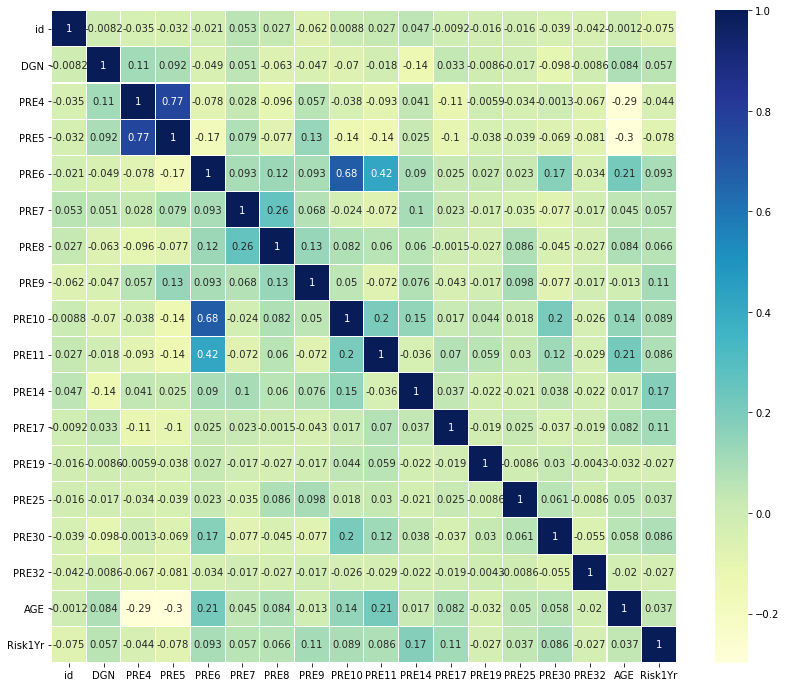

In [81]:
#Creating the Correlation Matrix For the Whole Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from sklearn.tree import DecisionTreeClassifier, export_graphviz

labelencoder=LabelEncoder() #it is used to convert the categorical data into machine readable form
for column in dF.columns:
    dF[column] = labelencoder.fit_transform(dF[column])


plt.figure(figsize=(14,12))
sns.heatmap(dF.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);
 

<h3>Total 4 Columns have been selected from the dataset based on their correlation.</h3>

<b>PRE4</b> - Forced vital capacity. It means the maximum amount of air you can forcibly exhale from your lungs after fully inhaling. This column 
maybe important for the lung related surgeries and their prediction.  

<b>PRE5</b> - Volume that has been exhaled at the end of the first second of forced expiration. It is used to classify the type of lung disease. The FEV1 is used with the FVC to differentiate between obstructive lung disease (FEV1/FVC < 70%) and restrictive lung disease (reduced FEV1 and FVC but normal FEV1/FVC relationship). An FEV1 of less than 1 L indicates significant lung disease.

<b>PRE6</b> - Performance status - Zubrod scale (PRZ2,PRZ1,PRZ0). It is related to the PRE5 column. PRZ0 means FEV1 high which means higher probability of lung disease. Rest 2 are comparatively lower chance of having lung disease.

<b>PRE10</b> - Cough before surgery (T,F). This column is also important because if there is cough before surgery there might be issues while operation and there might have something extra to do before going for the operation and without proper attention it might lead to death as well.



In [108]:
#creating the updated feature matrix using the important columns
up_df=dF[['PRE4','PRE5','PRE6','PRE10']]
up_df

,PRE4,PRE5,PRE6,PRE10
0,2.88,2.16,PRZ1,T
1,3.40,1.88,PRZ0,F
2,2.76,2.08,PRZ1,T
3,3.68,3.04,PRZ0,F
4,2.44,0.96,PRZ2,T
...,...,...,...,...
465,3.88,2.12,PRZ1,T
466,3.76,3.12,PRZ0,F
467,3.04,2.08,PRZ1,T
468,1.96,1.68,PRZ1,T


In [64]:
#seperating the target variable
y=dF['Risk1Yr']
y

0      0
1      0
2      0
3      0
4      1
      ..
465    0
466    0
467    0
468    0
469    0
Name: Risk1Yr, Length: 470, dtype: int32

<h3>This is a supervised machine learning model</h3>
<p>Because this is a labeled dataset and we know what type of data we are working with. Total 5 algorithms have been used to test the accuracy of this model. They are listed below : </p>
<li>Support Vector Machine</li>
<li>Decision Tree</li>
<li>K nearest neighbours</li>
<li>Logistic Regression</li>
<li>Naive Bayes</li>

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(up_df, y, test_size = 0.3, random_state = 16)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (329, 4)
X_test shape:  (141, 4)
y_train shape:  (329,)
y_test shape:  (141,)


<h3>Training and Testing Dataset</h3>

<b>Training</b> - 329 out of 470 data has been chosen for training the model<br>
<b>Testing</b> - 141 out of 470 data has been chosen for testing the model

In [112]:
perc=[]

<h3>Checking the Accuracy of the model based on Different ML Algorithms</h3>

In [118]:
# importing the necessary package to use the svm algorithm
from sklearn import svm 
model_svm = svm.SVC() 
model_svm.fit(X_train, y_train) 
y_prediction_svm = model_svm.predict(X_test) 
score_svm = metrics.accuracy_score(y_prediction_svm, y_test).round(4)
print('The accuracy of the model based on Support Vector Machine Algorithm is {}%'.format(score_svm*100))
perc.append(score_svm)

The accuracy of the model based on Support Vector Machine Algorithm is 89.36%


In [117]:
# importing the necessary package to use the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=4)
model_dt.fit(X_train, y_train)
y_prediction_dt = model_dt.predict(X_test)
score_dt = metrics.accuracy_score(y_prediction_dt, y_test).round(4)
print('The accuracy of the model based on Decision Tree Algorithm is {}%'.format(score_dt*100))
perc.append(score_dt)

The accuracy of the model based on Decision Tree Algorithm is 78.72%


In [116]:
# importing the necessary package to use the knn algorithm
from sklearn.neighbors import KNeighborsClassifier 
model_knn = KNeighborsClassifier(n_neighbors=3) 
model_knn.fit(X_train, y_train) 
y_prediction_knn = model_knn.predict(X_test)
score_knn = metrics.accuracy_score(y_prediction_knn, y_test).round(4)
print('The accuracy of the model based on K Nearest Neighbour Algorithm is {}%'.format(score_knn*100))
perc.append(score_knn)

The accuracy of the model based on K Nearest Neighbour Algorithm is 80.14%


In [113]:
# importing the necessary package to use the logistic regression algorithm
from sklearn.linear_model import LogisticRegression 
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_prediction_lr = model_lr.predict(X_test) 
score_lr = metrics.accuracy_score(y_prediction_lr, y_test).round(4)
print('The accuracy of the model based on Logistic Regression Algorithm is {}%'.format(score_lr*100))
perc.append(score_lr)

The accuracy of the model based on Logistic Regression Algorithm is 89.36%


In [114]:
# importing the necessary package to use the naive bayes algorithm
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_prediction_nb = model_nb.predict(X_test)
score_nb = metrics.accuracy_score(y_prediction_nb, y_test).round(4)
print('The accuracy of the model based on Naive Bayes Algorithm is {}%'.format(score_nb*100))
perc.append(score_nb)

The accuracy of the model based on Naive Bayes Algorithm is 89.36%


In [131]:
max=perc[0]
for i in range(0,len(perc),+1):
    if perc[i]>=max:
        max=perc[i]
        
print('The maximum accuracy from all these algorithm is '+str(max))  
   

The maximum accuracy from all these algorithm is 0.8936


<h3>Model Accuracy</h3>
<p>This model has an accuracy of 89.36%. Based on Support Vector Machine, Logistic Regression and Naive Bayes Algorithm.</p>

<h3>Discussion</h3>
<p>This model is created based on a thoracic surgery dataset which predicts after this surgery in 1 year the person will survive or not. This model has an accuracy of 89.36%. Which is not the best but not the worst as well. This accuracy was generated based on all the best possible decisions such as choosing the important column to test the data. Still as the accuracy is not around 95% which is thought to be ideal it might be the problem of the dataset. For example, it could have more columns which had more correlation with other variables to predict better. Also it could have more rows of data to train the model better. This model has increased the knowledge about machine learning specifically the supervised machine learning. As, it was based on real life dataset, the prediction can also be called realistic if it predicts the correct result.</p>